In [37]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import cmath

cwd = os.getcwd()
sys.path.append(cwd+"/../handy_functions")

from concat_pickles import get_outputs,get_outputsSweep,print_df
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

pal = sns.husl_palette(8)
mtfef_pal = ['forestgreen','mediumpurple']

data_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/runs'
fig_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/grc'

In [2]:
conditions = ["bn0"]
column_names = ['sess','repeat','outer_fold','nMT','nFEF','model','mean_R2','mean_rho','mean_R2_null','mean_rho_null']
df = get_outputs(data_folder+'/all_decoders',conditions,column_names)
df.head(1)

,sess,repeat,outer_fold,nMT,nFEF,model,mean_R2,mean_rho,mean_R2_null,mean_rho_null
0,16,0,0,24,24,0,-0.011687,-0.025916,-0.010374,-0.011118


# FIGURE 2

[Text(0, 0.5, '')]

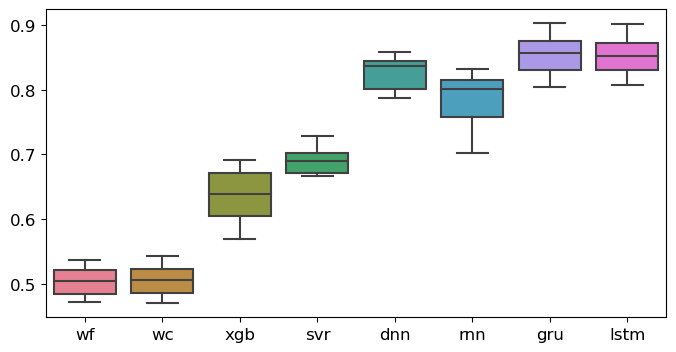

In [85]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1,1, figsize=(8,4))

#'bad' sessions: 16
#'semi' sessions: 18,20,34,38
#'good' sessions: 19*,21,22,23*,24,25,27,28,29*,32,33,35
hue_plot_params = {'data':df.loc[df['sess']==24], 'x':'model', 'y':'mean_R2', 'palette':'husl'}
a = sns.boxplot(ax=ax, **hue_plot_params)
#a.set_xticklabels(['wf','wc','xgb'])
a.set_xticklabels(['wf','wc','xgb','svr','dnn','rnn','gru','lstm'], rotation=0)
        
a.set(xlabel=None)
a.set(ylabel=None)

#fig.savefig(fig_folder+'/model_R2.png', dpi=600, bbox_inches='tight') 

In [ ]:
with open(data_folder+'/all_decoders/fold06-m6-eyetrace.pickle', 'rb') as f:
    y_test,y_test_predicted = pickle.load(f)
    
#plt.rcParams.update({'font.size': 14})
x = np.arange(0, 31*50, 50) - 500
print(x)
fig, axes = plt.subplots(2,2,figsize=(5,3))
fig.tight_layout()

start_end = [1272,1303]
axes[0,0].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[0,0].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[0,0].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[0,0].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[0,0].set_ylim(-12.5, 14.5)
axes[0,0].set_yticks([-10,0,10])
axes[0,0].set_xticks([])

start_end = [87,118] 
axes[0,1].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='$X_{true}$')
axes[0,1].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='$X_{decoded}$')
axes[0,1].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='$Y_{true}$')
axes[0,1].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='$Y_{decoded}$')
axes[0,1].set_ylim(-1.25, 12.5)
axes[0,1].set_yticks([0,10])
axes[0,1].set_xticks([])

start_end = [1047,1078] 
axes[1,0].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[1,0].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[1,0].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[1,0].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[1,0].set_ylim(-12.5,2)
axes[1,0].set_yticks([-10,0])
axes[1,0].set_xticks([-500,0,500,1000])

start_end = [184,215] 
axes[1,1].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[1,1].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[1,1].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[1,1].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[1,1].set_ylim(-14.75, 14)
axes[1,1].set_yticks([-10,0,10])
axes[1,1].set_xticks([-500,0,500,1000])

plt.subplots_adjust(wspace=0.25, hspace=0.05)

axes[0,1].legend(loc='lower center', bbox_to_anchor=(-0.12, 0.95),
          fancybox=False, shadow=False, ncol=4, fontsize="10",frameon=False)

#fig.savefig(fig_folder+'/model_4traces.png', dpi=600, bbox_inches='tight') 

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(3,3))

start_end = [1272,1303]
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [87,118] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [1047,1078] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [184,215] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

#fig.savefig(fig_folder+'/model_stacktraces.png', dpi=600, bbox_inches='tight') 

# Figure 2

In [6]:
conditions = ["m00"]
column_names = ['sess','outer_fold','nMT','nFEF','model','mean_R2','mean_rho','mean_R2_null','mean_rho_null','time_elapsed','neuron_dropped','mean_R2_    FULL','mean_rho_FULL','mean_R2_null_FULL','mean_rho_null_FULL']
df2 = get_outputsSweep(data_folder+'/neuron_dropping',conditions,column_names)
df2.head(1)

,sess,outer_fold,nMT,nFEF,model,mean_R2,mean_rho,mean_R2_null,mean_rho_null,time_elapsed,neuron_dropped,mean_R2_ FULL,mean_rho_FULL,mean_R2_null_FULL,mean_rho_null_FULL
0,16,0,23,24,0,-0.01205,-0.024693,-0.009135,-0.00602,26.151525,0,-0.011687,-0.025916,-0.010374,-0.011118


0.31170379952345134


[Text(83.22222222222221, 0.5, '')]

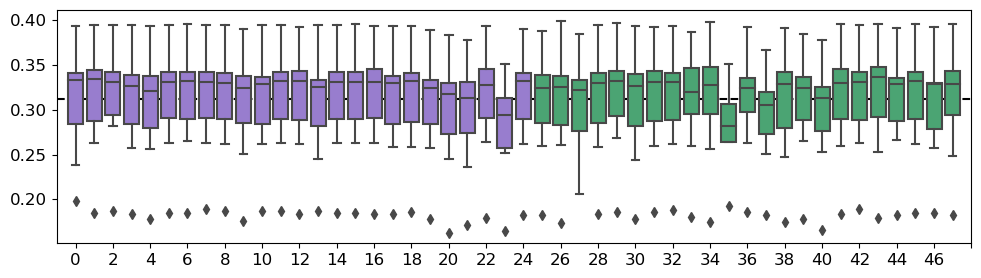

In [179]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1,1, figsize=(10,3))
fig.tight_layout()

#'bad' sessions: 16
#'semi' sessions: 18,20,34,38
#'good' sessions: 19*,21,22,23*,24,25,27,28,29*,32,33,35
sess = 25
#units = pd.read_csv('/Users/kendranoneman/Projects/mayo/NeuralDecoding/datasets/units'+'/units-pa{}dir4A-pre500-post300'.format(sess)+'.csv')
#print_df(units)

dat = df2.loc[(df2['sess']==sess)& (df2['outer_fold']!=5)& (df2['outer_fold']!=8)].reset_index()
print((dat['mean_R2_    FULL'].values).mean())
mtfef_pal = []
for i in range(int(dat.iloc[0]['nFEF'])+1):
    if int(dat.iloc[0]['nFEF']) !=0:
        mtfef_pal.append('mediumpurple')
for i in range(int(dat.iloc[0]['nMT'])):
    mtfef_pal.append('mediumseagreen')
    
hue_plot_params = {'data':dat, 'x':'neuron_dropped', 'y':'mean_R2','palette':mtfef_pal}
a = sns.boxplot(ax=ax, **hue_plot_params,zorder=1)
a.axhline((dat['mean_R2_    FULL'].values).mean(),linestyle='--',color='black',zorder=0)
a.set_xticks(np.arange(0,len(mtfef_pal)+1,2))
a.set_xlim(-1,len(mtfef_pal))
a.set(xlabel=None)
a.set(ylabel=None)

#fig.savefig(fig_folder+'/neuron_dropping.png', dpi=600, bbox_inches='tight') 